<a href="https://colab.research.google.com/github/21Alul21/3MTT_Machine_Learning_Capstone_project/blob/main/augustine_alul_agaji_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT ON**
## Predictive Analytics for Healthcare
### By
### *Augustine Alul Agaji*

In [ ]:
# importing all the required libraries used for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
# loading the dataset from this current directory as a 'df' instance

df = pd.read_csv('/content/project1_data.csv')

In [ ]:
# to be sure that the data was loaded correctly
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,typical angina,125.0,212.0,less than 120mg/ml,ST-T wave abnormality,168.0,no,1.0,downsloping,2.0,NaN,0
1,53.0,1.0,typical angina,140.0,203.0,greater than 120mg/ml,normal,155.0,yes,3.1,upsloping,0.0,NaN,0
2,70.0,1.0,typical angina,145.0,174.0,less than 120mg/ml,ST-T wave abnormality,125.0,yes,2.6,NaN,0.0,NaN,0
3,61.0,1.0,typical angina,148.0,203.0,less than 120mg/ml,ST-T wave abnormality,161.0,no,0.0,downsloping,1.0,NaN,0
4,62.0,0.0,typical angina,138.0,294.0,greater than 120mg/ml,ST-T wave abnormality,NaN,NaN,1.9,flat,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,atypical angina,140.0,221.0,less than 120mg/ml,ST-T wave abnormality,164.0,yes,0.0,downsloping,0.0,reversible defect,1
1021,60.0,1.0,typical angina,125.0,258.0,less than 120mg/ml,normal,141.0,yes,NaN,flat,1.0,NaN,0
1022,47.0,1.0,typical angina,NaN,275.0,less than 120mg/ml,normal,NaN,yes,1.0,flat,1.0,reversible defect,0
1023,50.0,NaN,typical angina,110.0,254.0,less than 120mg/ml,normal,159.0,no,0.0,downsloping,0.0,reversible defect,1


# Exploratory Data Analysis (EDA)
## - To understand nature of the data, and know if there will be need to fill missing values and perform data cleansing

In [ ]:
# short description of the dataset
# this has shown that there are 14 columns, and 6 columns contain 'object' data type,
# 7 contains 'float' and 1 is 'int'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       995 non-null    float64
 1   sex       995 non-null    float64
 2   cp        995 non-null    object 
 3   trestbps  995 non-null    float64
 4   chol      995 non-null    float64
 5   fbs       995 non-null    object 
 6   restecg   995 non-null    object 
 7   thalach   995 non-null    float64
 8   exang     995 non-null    object 
 9   oldpeak   995 non-null    float64
 10  slope     995 non-null    object 
 11  ca        995 non-null    float64
 12  thal      599 non-null    object 
 13  target    1025 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 112.2+ KB


In [ ]:
# statistical description of the data
df.describe()

,age,sex,trestbps,chol,thalach,oldpeak,ca,target
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,1025.000000
mean,54.527638,0.691457,131.629146,245.984925,149.069347,1.067538,0.759799,0.513171
std,9.089428,0.462124,17.621272,51.807809,22.932940,1.180015,1.032467,0.500070
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,132.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,240.000000,152.000000,0.800000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.500000,165.500000,1.800000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [ ]:
# displaying the first five data points
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,typical angina,125.0,212.0,less than 120mg/ml,ST-T wave abnormality,168.0,no,1.0,downsloping,2.0,NaN,0
1,53.0,1.0,typical angina,140.0,203.0,greater than 120mg/ml,normal,155.0,yes,3.1,upsloping,0.0,NaN,0
2,70.0,1.0,typical angina,145.0,174.0,less than 120mg/ml,ST-T wave abnormality,125.0,yes,2.6,NaN,0.0,NaN,0
3,61.0,1.0,typical angina,148.0,203.0,less than 120mg/ml,ST-T wave abnormality,161.0,no,0.0,downsloping,1.0,NaN,0
4,62.0,0.0,typical angina,138.0,294.0,greater than 120mg/ml,ST-T wave abnormality,NaN,NaN,1.9,flat,3.0,NaN,0


In [ ]:
# displaying the last five datapoints
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59.0,1.0,atypical angina,140.0,221.0,less than 120mg/ml,ST-T wave abnormality,164.0,yes,0.0,downsloping,0.0,reversible defect,1
1021,60.0,1.0,typical angina,125.0,258.0,less than 120mg/ml,normal,141.0,yes,NaN,flat,1.0,NaN,0
1022,47.0,1.0,typical angina,NaN,275.0,less than 120mg/ml,normal,NaN,yes,1.0,flat,1.0,reversible defect,0
1023,50.0,NaN,typical angina,110.0,254.0,less than 120mg/ml,normal,159.0,no,0.0,downsloping,0.0,reversible defect,1
1024,54.0,1.0,typical angina,120.0,188.0,less than 120mg/ml,ST-T wave abnormality,113.0,no,1.4,flat,1.0,NaN,0


In [ ]:
# checking for missing values in the dataset
# the values below shows all the missing values against their respective columns
df.isna().sum()

age          30
sex          30
cp           30
trestbps     30
chol         30
fbs          30
restecg      30
thalach      30
exang        30
oldpeak      30
slope        30
ca           30
thal        426
target        0
dtype: int64

In [ ]:
# the data shape shows that the dataset has 1025 rows 14 columns
df.shape

(1025, 14)

# Feature Engineering

## - Filling Missing Values

In [ ]:
# defining two reusable functions that will be appropriately called to filled missing values when;
# the missing values are to be filled with an average of all the values in the column,
# or when missing values are to be filled with a the 'mode' of the column values


def fill_missing_average(*values) -> None:     # to fill missing values with the average value
    for value in values:
        average_value = df[value].mean()
        df[value].fillna(average_value, inplace=True)

def fill_missing_mode(*values) -> None:        # to fill missing values with the mode value
    for value in values:
        most_occurrent = df[value].mode()[0]
        df[value].fillna(most_occurrent, inplace=True)


In [ ]:
average_fill_values = ['age', 'trestbps', 'chol', 'ca', 'thalach']
mode_fill_values = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'thal']

In [ ]:
fill_missing_average(*average_fill_values)    # calling the function to fill missing average values
fill_missing_mode(*mode_fill_values)          # calling the function to fill missing mode values

In [ ]:
# checking if there are still missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59.0,1.0,atypical angina,140.000000,221.0,less than 120mg/ml,ST-T wave abnormality,164.000000,yes,0.0,downsloping,0.0,reversible defect,1
1021,60.0,1.0,typical angina,125.000000,258.0,less than 120mg/ml,normal,141.000000,yes,0.0,flat,1.0,reversible defect,0
1022,47.0,1.0,typical angina,131.629146,275.0,less than 120mg/ml,normal,149.069347,yes,1.0,flat,1.0,reversible defect,0
1023,50.0,1.0,typical angina,110.000000,254.0,less than 120mg/ml,normal,159.000000,no,0.0,downsloping,0.0,reversible defect,1
1024,54.0,1.0,typical angina,120.000000,188.0,less than 120mg/ml,ST-T wave abnormality,113.000000,no,1.4,flat,1.0,reversible defect,0


<Axes: xlabel='None', ylabel='count'>

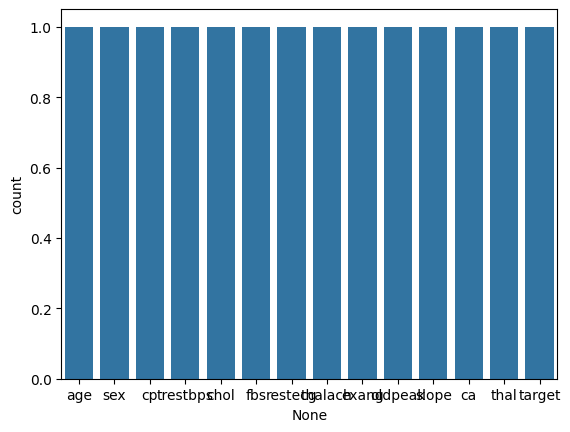

In [ ]:
# visualizing all the columns in the dataset
# this shows that they are all 100% complete with no missing value

sns.countplot(x=df.columns)


# Encoding
### - Converting the values that are of the 'object' data type to integer for easy training of the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 112.2+ KB


In [ ]:
cp_col = df.cp.unique()
cp_col

array(['typical angina', 'atypical angina', 'non-anginal pain',
       'asymptomatic'], dtype=object)

In [ ]:
fbs_col = df.fbs.unique()
fbs_col

array(['less than 120mg/ml', 'greater than 120mg/ml'], dtype=object)

In [ ]:
restecg_col = df.restecg.unique()
restecg_col

array(['ST-T wave abnormality', 'normal', 'left ventricular hypertrophy'],
      dtype=object)

In [ ]:
exang_col = df.exang.unique()
exang_col

array(['no', 'yes'], dtype=object)

In [ ]:
slope_col = df.slope.unique()
slope_col

array(['downsloping', 'upsloping', 'flat'], dtype=object)

In [ ]:
thal_col = df.thal.unique()
thal_col

array(['reversible defect', 'fixed defect', 'normal'], dtype=object)

In [ ]:
# function for handling the encoding, using a dictionary comprehension

def encoder(*values):
    encoded_dict = {value:index for index, value in enumerate(values)}
    return encoded_dict



In [ ]:
encoded_cp = encoder(*cp_col)
encoded_fbs = encoder(*fbs_col)
encoded_restecg = encoder(*restecg_col)
encoded_exang = encoder(*exang_col)
encoded_slope = encoder(*slope_col)
encoded_thal = encoder(*thal_col)

In [ ]:
encoded_cp

{'typical angina': 0,
 'atypical angina': 1,
 'non-anginal pain': 2,
 'asymptomatic': 3}

In [ ]:
encoded_fbs


{'less than 120mg/ml': 0, 'greater than 120mg/ml': 1}

In [ ]:
encoded_restecg


{'ST-T wave abnormality': 0, 'normal': 1, 'left ventricular hypertrophy': 2}

In [ ]:
encoded_exang


{'no': 0, 'yes': 1}

In [ ]:
encoded_slope


{'downsloping': 0, 'upsloping': 1, 'flat': 2}

In [ ]:
encoded_thal

{'reversible defect': 0, 'fixed defect': 1, 'normal': 2}

### Replacing 'object datatype' values with the code numbers

In [ ]:
# before encoding the cp feature
df.cp

0        typical angina
1        typical angina
2        typical angina
3        typical angina
4        typical angina
             ...       
1020    atypical angina
1021     typical angina
1022     typical angina
1023     typical angina
1024     typical angina
Name: cp, Length: 1025, dtype: object

In [ ]:
# after encoding the cp feature
df.replace(encoded_cp, inplace=True)

In [ ]:
df.cp

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    0
1024    0
Name: cp, Length: 1025, dtype: int64

In [ ]:
df.replace(encoded_fbs, inplace=True)

In [ ]:
df.replace(encoded_restecg, inplace=True)

In [ ]:
df.replace(encoded_exang, inplace=True)

In [ ]:
df.replace(encoded_slope, inplace=True)

In [ ]:
df.replace(encoded_thal, inplace=True)


### Splitting the data to X and Y, which represents the training features and label
### 20% for testing and 80% for training


In [ ]:
y = df.target
x = df.drop(['target'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1.0,0,125.000000,212.0,0,0,168.000000,0,1.0,0,2.0,0
1,53.0,1.0,0,140.000000,203.0,1,1,155.000000,1,3.1,1,0.0,0
2,70.0,1.0,0,145.000000,174.0,0,0,125.000000,1,2.6,2,0.0,0
3,61.0,1.0,0,148.000000,203.0,0,0,161.000000,0,0.0,0,1.0,0
4,62.0,0.0,0,138.000000,294.0,1,0,149.069347,0,1.9,2,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1,140.000000,221.0,0,0,164.000000,1,0.0,0,0.0,0
1021,60.0,1.0,0,125.000000,258.0,0,1,141.000000,1,0.0,2,1.0,0
1022,47.0,1.0,0,131.629146,275.0,0,1,149.069347,1,1.0,2,1.0,0
1023,50.0,1.0,0,110.000000,254.0,0,1,159.000000,0,0.0,0,0.0,0


In [ ]:
# using LogisticRegression as our first algorithm to train our model

logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction_1 = logistic_regression.predict(x_test)

In [ ]:
accuracy_score(y_test, prediction_1)

0.775609756097561

In [ ]:
prediction_1

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()

In [ ]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction_2 = decision_tree_classifier.predict(x_test)

In [ ]:
prediction_2

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
accuracy_score(y_test, prediction_2)

0.9560975609756097

In [ ]:
svm = SVC()

In [ ]:
svm.fit(x_train, y_train)

SVC()

In [ ]:
prediction_3 = svm.predict(x_test)
prediction_3

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1])

In [ ]:
accuracy_score(y_test, prediction_3)

0.6829268292682927

### Scaling the dataset to see the differnce in performance of the various algorithms
### and using it to train the models to see the difference in performance

In [ ]:
# scaling the 'x' features

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
xs_train, xs_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
logistic_regression_scaled = LogisticRegression()

In [ ]:
logistic_regression_scaled.fit(xs_train, y_train)

LogisticRegression()

In [ ]:
prediction_1_scaled = logistic_regression_scaled.predict(xs_test)

In [ ]:
# this shows a slight improvement(78%) after scaling, as compared to 77% before scaling
# for the LogisticRegression Algorithm

accuracy_score(y_test, prediction_1_scaled)

0.7853658536585366

In [ ]:
svm_scaled = SVC()
svm_scaled.fit(xs_train, y_train)

SVC()

In [ ]:
prediction_3_scaled = svm_scaled.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
# this shows a reduction in the performance of the model (50%) after scaling, as compared to 68% before scaling
# for the SupportVectorMchines (svm) Algorithm

accuracy_score(y_test, prediction_3_scaled)

0.5024390243902439

In [ ]:
# checking the correlation in the dataset
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.093223,-0.078751,0.255348,0.203459,0.111167,0.185275,-0.368943,0.075293,0.202953,0.176633,0.258982,0.040237,-0.225169
sex,-0.093223,1.000000,-0.055882,-0.078356,-0.193191,0.021920,-0.020357,-0.043059,0.144341,0.072711,-0.014841,0.103026,0.117926,-0.274673
cp,-0.078751,-0.055882,1.000000,0.019083,-0.087403,0.048843,-0.094455,0.304549,-0.386689,-0.164264,-0.147903,-0.168092,-0.069256,0.428210
trestbps,0.255348,-0.078356,0.019083,1.000000,0.125599,0.175005,0.169311,-0.031690,0.061799,0.196974,0.060372,0.112747,0.060871,-0.141630
chol,0.203459,-0.193191,-0.087403,0.125599,1.000000,0.033213,0.170780,-0.007773,0.049198,0.070288,0.056701,0.065560,-0.092411,-0.093212
fbs,0.111167,0.021920,0.048843,0.175005,0.033213,1.000000,0.059092,-0.008096,0.068518,0.007044,0.000115,0.135653,0.107804,-0.046863
restecg,0.185275,-0.020357,-0.094455,0.169311,0.170780,0.059092,1.000000,-0.133718,0.094658,0.159428,0.161640,0.098741,0.072438,-0.187522
thalach,-0.368943,-0.043059,0.304549,-0.031690,-0.007773,-0.008096,-0.133718,1.000000,-0.363217,-0.329707,-0.430942,-0.193409,-0.155651,0.412259
exang,0.075293,0.144341,-0.386689,0.061799,0.049198,0.068518,0.094658,-0.363217,1.000000,0.287376,0.273632,0.102086,0.068203,-0.428806
oldpeak,0.202953,0.072711,-0.164264,0.196974,0.070288,0.007044,0.159428,-0.329707,0.287376,1.000000,0.399701,0.221709,0.086372,-0.421608


<Axes: >

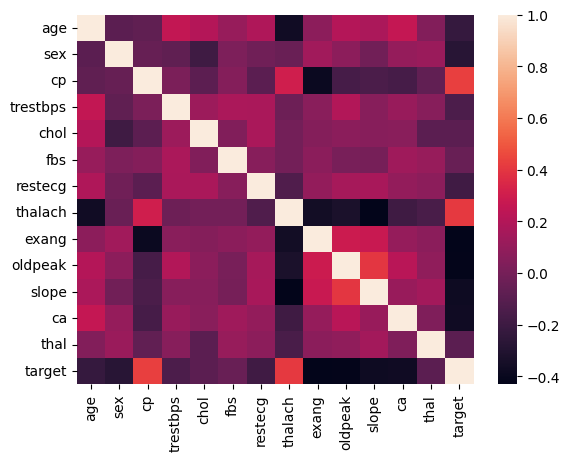

In [ ]:
#visualizing the correlation
sns.heatmap(df.corr())

### Using the xgboost library

In [ ]:
xgboost = xgb.XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction_4 = xgboost.predict(x_test)

In [ ]:
accuracy_score(y_test, prediction_4)

0.9707317073170731

In [ ]:
# using scaled x features to compare the model features


In [ ]:
xgboost_scaled = xgboost.fit(xs_train, y_train)
prediction_4_scaled = xgboost_scaled.predict(xs_test)

In [ ]:
accuracy_score(y_test, prediction_4_scaled)      # this has shown that there is no improvement in the model performance by scaling the input features 'x'

0.9707317073170731